In [1]:
from contextual_som import ContextualSom
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import os

In [2]:
with open(os.path.join("..", "out", "corpus.txt")) as f:
    corpus = f.read()

In [3]:
all_scores = defaultdict(list)

for _ in tqdm(range(100)):
    con_som = ContextualSom(corpus)
    con_som.preprocess()
    con_som.train(60, 50, 400, sigma=25, learning_rate=0.5)
    scores = con_som.scores()
    
    for key in scores:
        all_scores[key].append(scores[key])

100%|██████████| 100/100 [24:23<00:00, 14.63s/it]


In [4]:
metrics = {k: (np.mean(v), np.std(v)) for k, v in all_scores.items()}
metrics

{'noun': (0.792121212121212, 0.039073548202926384),
 'verb': (0.681875, 0.07602168687289175),
 'closed_class': (0.7274603174603176, 0.03986550412847114),
 'quantifier': (0.2544444444444444, 0.18875485440573017),
 'classifier': (0.03333333333333333, 0.12909944487358055),
 'adjective': (0.21, 0.12387269450708031),
 'adverb': (0.4440740740740741, 0.07671138434639406),
 'interjection': (0.5204347826086957, 0.11202804806777292),
 'unknown': (0.0, 0.0)}

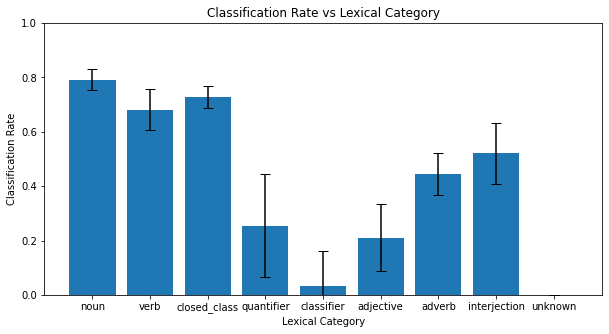

In [5]:
plt.figure(figsize=(10, 5))
plt.bar(*zip(*[(k, v[0]) for k, v in metrics.items()]), yerr=[v[1] for v in metrics.values()], capsize=5)

plt.xlabel("Lexical Category")
plt.ylabel("Classification Rate")
plt.title("Classification Rate vs Lexical Category")
plt.ylim([0, 1])

plt.savefig("scores.png")
plt.show()